# Content

1 Loading and preparing data

2 Model training and validation

3 Preparation for profit calculation

4 Calculation of profit and risks

5 Conclusions

# Choosing the Best Location to Profit from an Oilfield

The task is choose the best location to drill a new well. We have samples in our data about three regions: in each there are 10000 fields, where the quality of oil and the volume of its reserves were measured.

We are going to build a machine learning model that will help determine the region where drilling will bring the greatest profit. Also, we will analize the possible profits and risks with the bootstrap technique.

These are the steps to select a location:

* Deposits are being searched for in the selected region, the values of the signs are determined for each.


* We build a model and we estimate the volume of stocks.


* The we choose the deposits with the highest estimates of values. The number of deposits depends on the company's budget and the cost of developing one well.


* The profit is equal to the total profit of the selected fields.

# Loading and preparing data

First of all, we import the necessary libraries.

In [1]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns

from scipy import stats as st

from sklearn.model_selection import train_test_split


In [2]:
data_1 = pd.read_csv(r'C:\Users\pinos\Desktop\statistics\geo_data_0.csv')

data_2 = pd.read_csv(r'C:\Users\pinos\Desktop\statistics\geo_data_1.csv')

data_3 = pd.read_csv(r'C:\Users\pinos\Desktop\statistics\geo_data_2.csv')

In [3]:
for i in (data_1, data_2, data_3):
    
    data_1.head().describe().info()
    
    data_2.head().describe().info()
    
    data_3.head().describe().info()
    
    display(i)

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float64
 2   f2       8 non-null      float64
 3   product  8 non-null      float64
dtypes: float64(4)
memory usage: 288.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float64
 2   f2       8 non-null      float64
 3   product  8 non-null      float64
dtypes: float64(4)
memory usage: 288.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float64
 2   f2       8 non-null      float64
 3   product  8 non-null      float64
dtypes: float64(4)
memory usage: 288.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float64
 2   f2       8 non-null      float64
 3   product  8 non-null      float64
dtypes: float64(4)
memory usage: 288.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float64
 2   f2       8 non-null      float64
 3   product  8 non-null      float64
dtypes: float64(4)
memory usage: 288.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float64
 2   f2       8 non-null      float64
 3   product  8 non-null      float64
dtypes: float64(4)
memory usage: 288.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       8 non-null      float64
 1   f1       8 non-null      float

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


We have four variables in front of us, one string type and four numeric float types.

In [4]:
def is_duplicated(data):
    
    return data.duplicated().sum()

In [5]:
is_duplicated(data_1) 
is_duplicated(data_2) 
is_duplicated(data_3) 

0

No duplicated data but just in case we are going to check the 'id' column with a loop.

In [6]:
def co_duplicated(data, column):
    
    return data[column].duplicated().sum()

In [7]:
co_duplicated(data_1, 'id')

10

In [8]:
co_duplicated(data_2, 'id')

4

In [9]:
co_duplicated(data_3, 'id')

4

There are some duplicates but doesn't matter, in fact, we're going to apply the regression line. We don't need the 'id' column, so we remove it.

In [10]:
def dropping(data): 
    
    return data.drop(['id'], axis=1)

In [11]:
data_1 = dropping(data_1)

data_2 = dropping(data_2)

data_3 = dropping(data_3)

We check that the column has been successfully deleted.

In [12]:
for i in (data_1, data_2, data_3):
    
    data_1.head()
    
    data_2.head()
    
    data_3.head()
    
    display (i)

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


It looks good!

Now we are going to visualize the correlation between columns.

AxesSubplot(0.125,0.125;0.62x0.755)


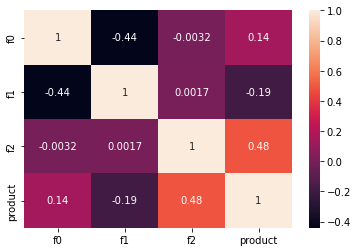

In [13]:
print(sns.heatmap(data_1.corr(), annot=True))  

AxesSubplot(0.125,0.125;0.62x0.755)


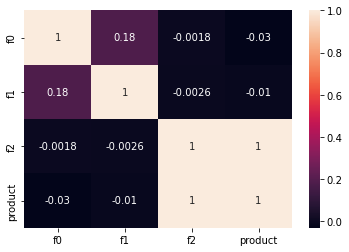

In [14]:
print(sns.heatmap(data_2.corr(), annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


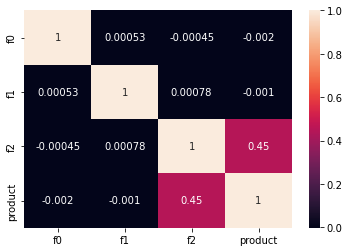

In [15]:
print(sns.heatmap(data_3.corr(), annot=True))

In the first set we see a widespread correlation of variables than in the second and third sets. However, we see a moderate correlation only in feature 2 and target.

# Model training and validation

We are performing a function that will help us divide the data sets into the necessary parts.

In [16]:
def split_data(data, numeric, target):
    
    features = data.drop([target] , axis=1)
    
    target = data[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    
        features, target, 
        
        test_size=0.25, 
        
        random_state=42)
    
    pd.options.mode.chained_assignment = None
    
    scaler = StandardScaler()
    
    scaler.fit(features_train[numeric])
    
    features_train[numeric] = scaler.transform(features_train[numeric])
    
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train, features_valid, target_train, target_valid

We use the function to dial dataset number 1.

In [17]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(
    
    data_1, ['f0', 'f1', 'f2'], 'product')

We apply a linear regression model and train.

In [18]:
model_1 = LinearRegression()

model_1_fit = model_1.fit(features_train_1, target_train_1)

Now the prediction.

In [19]:
model_1_predicted = model_1.predict(features_valid_1)

# We keep valid data

valid_predictions_1 = pd.Series(model_1_predicted).reset_index(drop=True)

We calculate the mean squared error and the mean for each region.

In [36]:
print('RMSE:', mean_squared_error(target_valid_1, model_1_predicted)**0.5)

print('The average predicted value for region number 1 is:', 
      
      valid_predictions_1.mean())

RMSE: 37.75660035026169
The average predicted value for region number 1 is: 92.3987999065781


We are going to repeat the process for the rest of the data.

In [37]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(
    
    data_2, ['f0', 'f1', 'f2'], 'product')

model_2 = LinearRegression()

model_2_fit = model_2.fit(features_train_2, target_train_2)

model_2_predicted = model_2.predict(features_valid_2)

valid_predictions_2 = pd.Series(model_2_predicted).reset_index(drop=True)

print('RMSE:', mean_squared_error(target_valid_2, model_2_predicted)**0.5)

print('The average predicted value for region number 2 is:', 
      
      valid_predictions_2.mean())

RMSE: 0.8902801001028837
The average predicted value for region number 2 is: 68.71287803913762


In [38]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = split_data(
    
    data_3, ['f0', 'f1', 'f2'], 'product')

model_3 = LinearRegression()

model_3_fit = model_3.fit(features_train_3, target_train_3)

model_3_predicted = model_3.predict(features_valid_3)

valid_predictions_3 = pd.Series(model_3_predicted).reset_index(drop=True)

print('RMSE:', mean_squared_error(target_valid_3, model_3_predicted)**0.5)

print('The average predicted value for region number 3 is:', 
      
      valid_predictions_3.mean())

RMSE: 40.145872311342174
The average predicted value for region number 3 is: 94.77102387765993


Based on the RMSE metric, we see that the value of the second set is more than twice than the others, so we can say that the error in this set is much smaller.

The results show that the forecast for the second set should be more accurate than for the first and third. In the next steps, we are going to test exactly this hypothesis.

# Preparation for profit calculation

All constant values for calculations are stored in separate variables.

In [23]:
BUDGET = 10000 # million rubles

TOTAL_BOREHOLE = 500 

MIN_BOREHOLE = 200

REVENUE_PER_BARREL = 0.45 

MIN_NEEDED = BUDGET / MIN_BOREHOLE / REVENUE_PER_BARREL

LOSS_PROB = 0.025

We calculate the indicators that interest us.

In [24]:
one_data_predicted = features_valid_1.copy()

one_data_predicted['predictions_product'] = model_1_fit.predict(features_valid_1)

one_data_predicted['profits'] = (one_data_predicted[
    
    'predictions_product'] * REVENUE_PER_BARREL).sort_values(ascending=False)

In [25]:
two_data_predicted = features_valid_2.copy()

two_data_predicted['predictions_product'] = model_2_fit.predict(features_valid_2)

two_data_predicted['profits'] = (two_data_predicted[
    
    'predictions_product'] * REVENUE_PER_BARREL).sort_values(ascending=False)


In [26]:
three_data_predicted = features_valid_3.copy()

three_data_predicted['predictions_product'] = model_3_fit.predict(features_valid_2)

three_data_predicted['profits'] = (three_data_predicted[
    
    'predictions_product'] * REVENUE_PER_BARREL).sort_values(ascending=False)


We check everything is as it has to be.

In [39]:
for i in one_data_predicted, one_data_predicted, one_data_predicted:
    
    one_data_predicted.head()
    
    two_data_predicted.head()
    
    three_data_predicted.head()
    
    display(i)

,f0,f1,f2,predictions_product,profits,break_even
75721,0.113830,-1.605391,-0.119836,101.901017,45.855458,240.503364
80184,0.274030,-1.417818,-1.187407,78.217774,35.197998,240.503364
19864,1.057896,-1.560307,0.371855,115.266901,51.870105,240.503364
76699,1.238466,-0.971658,0.090665,105.618618,47.528378,240.503364
92991,0.480343,-0.450600,0.027088,97.980185,44.091083,240.503364
...,...,...,...,...,...,...
21271,0.291949,-1.515226,0.030842,105.076959,47.284631,240.503364
34014,-0.644370,0.528145,-0.552783,74.768176,33.645679,240.503364
81355,0.107509,-1.342572,-0.934248,82.544397,37.144978,240.503364
65720,-0.345986,0.403163,-0.311768,81.826689,36.822010,240.503364


,f0,f1,f2,predictions_product,profits,break_even
75721,0.113830,-1.605391,-0.119836,101.901017,45.855458,240.503364
80184,0.274030,-1.417818,-1.187407,78.217774,35.197998,240.503364
19864,1.057896,-1.560307,0.371855,115.266901,51.870105,240.503364
76699,1.238466,-0.971658,0.090665,105.618618,47.528378,240.503364
92991,0.480343,-0.450600,0.027088,97.980185,44.091083,240.503364
...,...,...,...,...,...,...
21271,0.291949,-1.515226,0.030842,105.076959,47.284631,240.503364
34014,-0.644370,0.528145,-0.552783,74.768176,33.645679,240.503364
81355,0.107509,-1.342572,-0.934248,82.544397,37.144978,240.503364
65720,-0.345986,0.403163,-0.311768,81.826689,36.822010,240.503364


,f0,f1,f2,predictions_product,profits,break_even
75721,0.113830,-1.605391,-0.119836,101.901017,45.855458,240.503364
80184,0.274030,-1.417818,-1.187407,78.217774,35.197998,240.503364
19864,1.057896,-1.560307,0.371855,115.266901,51.870105,240.503364
76699,1.238466,-0.971658,0.090665,105.618618,47.528378,240.503364
92991,0.480343,-0.450600,0.027088,97.980185,44.091083,240.503364
...,...,...,...,...,...,...
21271,0.291949,-1.515226,0.030842,105.076959,47.284631,240.503364
34014,-0.644370,0.528145,-0.552783,74.768176,33.645679,240.503364
81355,0.107509,-1.342572,-0.934248,82.544397,37.144978,240.503364
65720,-0.345986,0.403163,-0.311768,81.826689,36.822010,240.503364


Perfect!

In [28]:
one_data_predicted['break_even'] = BUDGET / one_data_predicted['profits'].mean()

print('Minimum quantity of raw materials:', MIN_NEEDED)

print('Average offer in the region:', 
      
      one_data_predicted['predictions_product'].mean())

Minimum quantity of raw materials: 111.11111111111111
Average offer in the region: 92.3987999065781


In [29]:
two_data_predicted['break_even'] = BUDGET / two_data_predicted['profits'].mean()

print('Minimum quantity of raw materials:', MIN_NEEDED)

print('Average offer in the region:', 
      
      two_data_predicted['predictions_product'].mean())

Minimum quantity of raw materials: 111.11111111111111
Average offer in the region: 68.71287803913762


In [30]:
three_data_predicted['break_even'] = BUDGET / three_data_predicted['profits'].mean()

print('Minimum quantity of raw materials:', MIN_NEEDED)

print('Average offer in the region:', 
      
      three_data_predicted['predictions_product'].mean())

Minimum quantity of raw materials: 111.11111111111111
Average offer in the region: 94.88898500879517


In this section, we have created constant variables that will help us measure whether the regions in front of us really meet the requirements for production and profit.

We have also created two new columns with forecasts for both product, and profit.

Finally, we calculated the minimum amount of raw materials needed to make a profit in these regions, and found that each region requires a minimum of 111.11 raw materials, in the next stages we will see if this amount corresponds to each of the locations.

# Calculation of profit and risks

Now is time to analyze the risks and benefits for each region.

In [31]:
def function(predicted, product):
    
    predicted_product = predicted.reset_index(drop=True) 
    
    real_product = product.reset_index(drop=True)  

    predicted_product = {
        
        'predicted': predicted_product,
        'product': real_product
    }

    product_and_predicted = pd.DataFrame(data=predicted_product)
    
    return product_and_predicted  

In [32]:
product_and_predicted_1 = function(valid_predictions_1, target_valid_1)

In [33]:
product_and_predicted_2 = function(valid_predictions_2, target_valid_2)

In [34]:
product_and_predicted_3 = function(valid_predictions_3, target_valid_3)

In [35]:
for i in product_and_predicted_1, product_and_predicted_2, product_and_predicted_3:
    
    product_and_predicted_1.head(), 
    
    product_and_predicted_2.head(), 
         
    product_and_predicted_3.head()
    
    display(i)


,predicted,product
0,101.901017,122.073350
1,78.217774,48.738540
2,115.266901,131.338088
3,105.618618,88.327757
4,97.980185,36.959266
...,...,...
24995,105.076959,148.821520
24996,74.768176,123.454003
24997,82.544397,91.945213
24998,81.826689,149.295563


,predicted,product
0,0.844738,0.000000
1,52.921612,53.906522
2,135.110385,134.766305
3,109.494863,107.813044
4,-0.047292,0.000000
...,...,...
24995,108.351600,107.813044
24996,53.604049,53.906522
24997,26.708734,26.953261
24998,109.823087,110.992147


,predicted,product
0,98.301916,117.441301
1,101.592461,47.841249
2,52.449099,45.883483
3,109.922127,139.014608
4,72.411847,84.004276
...,...,...
24995,102.764169,40.797226
24996,93.431823,87.144239
24997,64.098390,52.039812
24998,83.764135,136.961454


Now we are going to create a function for the sum of the stock product.

In [40]:
def sum_actual_product(data):
    
    stock_product = data['product'].sum()
    
    return stock_product

In [58]:
real_target_1 = sum_actual_product(product_and_predicted_1)

print(f'The target value of the volume of raw materials corresponding to the forecasts: {real_target_1} thousands of barrels')

The target value of the volume of raw materials corresponding to the forecasts: 2308148.909271097 thousands of barrels


In [56]:
real_target_2 = sum_actual_product(product_and_predicted_2)

print(f'The target value of the volume of raw materials corresponding to the forecasts: {real_target_2} thousands of barrels')

The target value of the volume of raw materials corresponding to the forecasts: 1718134.5186806861 thousands of barrels


In [57]:
real_target_3 = sum_actual_product(product_and_predicted_3)

print(f'The target value of the volume of raw materials corresponding to the forecasts: {real_target_3} thousands of barrels')

The target value of the volume of raw materials corresponding to the forecasts: 2378774.97679299 thousands of barrels


In [47]:
def income(product_and_predicted, count):
    
    sort_pred = product_and_predicted.sort_values(by='predicted', ascending=False) 
    
    selected = product_and_predicted['product'][sort_pred.index][:count].sum() 
    
    net_income = (selected * REVENUE_PER_BARREL) - BUDGET
    
    return net_income

Now we are going to forecast the revenue.

In [49]:
income_1 = income(product_and_predicted_1, MIN_BOREHOLE)

print(f'Profit for the received volume of raw materials: {income_1} in million rubles')

Profit for the received volume of raw materials: 3359.1411144621798 in million rubles


In [50]:
income_2 = income(product_and_predicted_2, MIN_BOREHOLE)

print(f'Profit for the received volume of raw materials: {income_2} in million rubles')

Profit for the received volume of raw materials: 2415.086696681512 in million rubles


In [51]:
income_3 = income(product_and_predicted_3, MIN_BOREHOLE)

print(f'Profit for the received volume of raw materials: {income_3} in million rubles')

Profit for the received volume of raw materials: 2598.571759374112 in million rubles


Let's calculate the risks and profits for each region:

· We use the Bootstrap technique with 1000 samples to find the profit distribution.

· We want to find the average profit, 95% confidence interval and risk of losses.

In [52]:
def bootstraping(product_and_predicted):
    
    state = np.random.RandomState(12345)
    
    values = []
    
    count = 0
    
    for i in range(1000):
        
        target_subsample = product_and_predicted['product'].sample(
            
            n=TOTAL_BOREHOLE, 
            
            replace=True, 
            
            random_state=state)
        
        pred_subsample = product_and_predicted['predicted'] [target_subsample.index]
        
        total_income = income(function(pred_subsample, target_subsample), MIN_BOREHOLE)
        
        values.append(total_income)
        
        if total_income < 0:
            
            count += 1
    
    values = pd.Series(values)
    
    lower = values.quantile(0.025)
    
    upper = values.quantile(0.975)

    mean = values.mean()
    
    confidence_interval = lower, upper
    
    print('Average income for the top 200 locations: {} million rubles.'.format(mean) )
    
    print('2,5% quantile:', lower, 'million rubles')
    
    print('Quantile 97,5%:', upper, 'million rubles')
    
    print('95% confidence interval:', confidence_interval, 'million rubles')
    
    # bootstrap
    
    pvalue = 1. * count / 1000 
    
    if pvalue < LOSS_PROB:
        
        print('The probability of losing is {:.2%}, the region meets the criterion'.format(
            pvalue))
        
    else:
        
        print('The probability of loss is {:.2%}, the region does not meet the criterion'.format(
            pvalue))

    plt.figure()
    
    h = plt.hist(values, bins=100)

    # the left limit of the confidence interval
    
    one_x, one_y = [confidence_interval[0], confidence_interval[0]], [0, 30]
    
    # the right boundary of the confidence interval
    
    two_x, two_y = [confidence_interval[1], confidence_interval[1]], [0, 30]
    
    plt.title('Income distribution histogram')
    
    plt.xlabel('Income, million rubles')
    
    plt.plot(one_x, one_y, two_x, two_y, marker='o')

Average income for the top 200 locations: 406.27878342441966 million rubles.
2,5% quantile: -117.74213649486877 million rubles
Quantile 97,5%: 911.7370507514058 million rubles
95% confidence interval: (-117.74213649486877, 911.7370507514058) million rubles
The probability of loss is 6.70%, the region does not meet the criterion


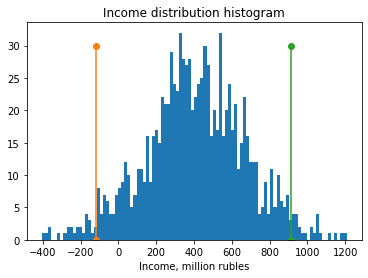

In [53]:
bootstraping(product_and_predicted_1)

Average income for the top 200 locations: 432.6241318131376 million rubles.
2,5% quantile: 16.846174932431587 million rubles
Quantile 97,5%: 815.9725262857513 million rubles
95% confidence interval: (16.846174932431587, 815.9725262857513) million rubles
The probability of losing is 1.90%, the region meets the criterion


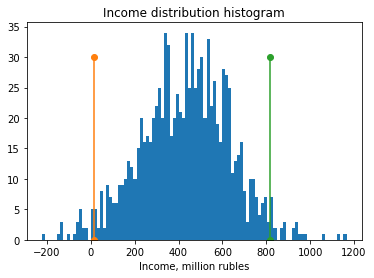

In [54]:
bootstraping(product_and_predicted_2)

Average income for the top 200 locations: 377.3621924229166 million rubles.
2,5% quantile: -170.780417705727 million rubles
Quantile 97,5%: 901.7721313864456 million rubles
95% confidence interval: (-170.780417705727, 901.7721313864456) million rubles
The probability of loss is 7.40%, the region does not meet the criterion


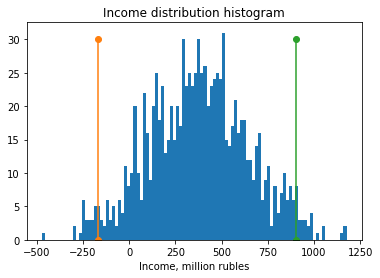

In [55]:
bootstraping(product_and_predicted_3)

Conclusions:

· All three analyzed regions meet the budget criterion, that is, they are within the planned amount.

· Of the three regions, the only one that meets all the criteria, and therefore the most profitable and with the least risks is the second region.

· The region where production costs will be highest is the third, followed by the first.

· In the first region with a 95% confidence interval, the left border takes a negative value of -117.74213649486877, which means that more than 2.5% will be loss.

· In the second region, the left border is positive, which is a good sign that tells us that the risks in this region are limited.

· In the third region, the negative values of the chart warn us that this area is not quite suitable for investment, so we should act carefully before making a decision about this. This region is the most expensive and involves the greatest risk of all.